In [1]:
!git clone https://github.com/htrnguyen/CNN_TR_OCR.git

Cloning into 'CNN_TR_OCR'...
remote: Enumerating objects: 124, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 124 (delta 12), reused 34 (delta 5), pack-reused 77 (from 1)
Receiving objects: 100% (124/124), 109.69 MiB | 39.42 MiB/s, done.
Resolving deltas: 100% (49/49), done.


In [2]:
%cd /kaggle/working/CNN_TR_OCR 

/kaggle/working/CNN_TR_OCR


In [3]:
!git fetch origin
!git reset --hard origin/main       

HEAD is now at a1753f7 quick push


In [4]:
!pwd

/kaggle/working/CNN_TR_OCR


In [5]:
!cp -r /kaggle/input/vietnamese-ocr/labels /kaggle/working/CNN_TR_OCR/vietnamese
!cp -r /kaggle/input/vietnamese-ocr/test_image /kaggle/working/CNN_TR_OCR/vietnamese
!cp -r /kaggle/input/vietnamese-ocr/train_images /kaggle/working/CNN_TR_OCR/vietnamese
!cp -r /kaggle/input/vietnamese-ocr/unseen_test_images /kaggle/working/CNN_TR_OCR/vietnamese

In [6]:
!pip install -q python-Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 3.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 40.8 MB/s eta 0:00:0000:0100:01


In [81]:
%matplotlib inline

In [7]:
!python train_main.py

Using device: cuda
Vocabulary size: 231
Train dataset size: 25765
Test dataset size: 7200
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|███████████████████████████████████████| 97.8M/97.8M [00:00<00:00, 188MB/s]
/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: U

In [8]:
!python predict_eval.py

Found SOS token: '<SOS>'
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/kaggle/working/CNN_TR_OCR/predict_eval.py:134: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURI

# DETECTION


In [9]:
!pip install ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.0 MB/s eta 0:00:00:00:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pylibcugraph-cu12 24.12.0 requires pylibraft-cu12==24.12.*, but you have pylibraft-cu12 25.2.0 whic

In [10]:
import os
import glob
import random
from PIL import Image
from tqdm import tqdm

In [11]:
def polygon_to_bbox(polygon):
    xs = polygon[::2]
    ys = polygon[1::2]
    x_min, y_min, x_max, y_max = min(xs), min(ys), max(xs), max(ys)
    return x_min, y_min, x_max, y_max


def convert_to_yolo(img_width, img_height, bbox):
    x_min, y_min, x_max, y_max = bbox
    x_center = (x_min + x_max) / 2.0 / img_width
    y_center = (y_min + y_max) / 2.0 / img_height
    width = (x_max - x_min) / img_width
    height = (y_max - y_min) / img_height
    return x_center, y_center, width, height


def prepare_yolo_detection_set(
    label_dir, image_dir, yolo_img_dir, yolo_lbl_dir, file_list
):
    os.makedirs(yolo_img_dir, exist_ok=True)
    os.makedirs(yolo_lbl_dir, exist_ok=True)
    for img_id in tqdm(file_list):
        label_file = os.path.join(label_dir, f"gt_{img_id}.txt")
        img_name = f"im{int(img_id):04d}.jpg"
        img_path = os.path.join(image_dir, img_name)
        if not os.path.exists(img_path) or not os.path.exists(label_file):
            continue
        # Copy ảnh
        os.system(f'cp "{img_path}" "{yolo_img_dir}/{img_name}"')
        with Image.open(img_path) as img:
            w, h = img.size
        yolo_lines = []
        with open(label_file, encoding="utf-8") as f:
            for line in f:
                parts = line.strip().split(",")
                if len(parts) < 9 or parts[8] == "###":
                    continue
                poly = list(map(int, parts[:8]))
                bbox = polygon_to_bbox(poly)
                xc, yc, bw, bh = convert_to_yolo(w, h, bbox)
                yolo_lines.append(f"0 {xc:.6f} {yc:.6f} {bw:.6f} {bh:.6f}")
        yolo_lbl = os.path.join(yolo_lbl_dir, img_name.replace(".jpg", ".txt"))
        with open(yolo_lbl, "w", encoding="utf-8") as f:
            for yline in yolo_lines:
                f.write(yline + "\n")

In [12]:
# Lấy danh sách id ảnh
def get_ids(image_dir):
    return [
        os.path.splitext(f)[0].replace("im", "")
        for f in os.listdir(image_dir)
        if f.endswith(".jpg")
    ]


train_ids = get_ids("vietnamese/train_images")
random.shuffle(train_ids)
split_idx = int(len(train_ids) * 0.9)
train_split = train_ids[:split_idx]
val_split = train_ids[split_idx:]

test_ids = get_ids("vietnamese/test_image")

# Tạo cấu trúc folder YOLO
base_dir = "YOLO_dataset"
os.makedirs(base_dir, exist_ok=True)

In [13]:
# Chuẩn bị train/val
prepare_yolo_detection_set(
    label_dir="vietnamese/labels",
    image_dir="vietnamese/train_images",
    yolo_img_dir=f"{base_dir}/images/train",
    yolo_lbl_dir=f"{base_dir}/labels/train",
    file_list=train_split,
)
prepare_yolo_detection_set(
    label_dir="vietnamese/labels",
    image_dir="vietnamese/train_images",
    yolo_img_dir=f"{base_dir}/images/val",
    yolo_lbl_dir=f"{base_dir}/labels/val",
    file_list=val_split,
)
# Chuẩn bị test nếu cần
prepare_yolo_detection_set(
    label_dir="vietnamese/labels",
    image_dir="vietnamese/test_image",
    yolo_img_dir=f"{base_dir}/images/test",
    yolo_lbl_dir=f"{base_dir}/labels/test",
    file_list=test_ids,
)

100%|██████████| 300/300 [00:01<00:00, 286.48it/s]


In [14]:
with open(f"{base_dir}/data.yaml", "w") as f:
    f.write(
        f"""
train: {os.path.abspath(base_dir)}/images/train
val: {os.path.abspath(base_dir)}/images/val
test: {os.path.abspath(base_dir)}/images/test

nc: 1
names: ["text"]
"""
    )

In [15]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
model.train(data=f"{base_dir}/data.yaml", epochs=30, imgsz=640, batch=16, device=0)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 81.0MB/s]


Ultralytics 8.3.137 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=YOLO_dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, pr

100%|██████████| 755k/755k [00:00<00:00, 17.0MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 71.3MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1219.4±568.3 MB/s, size: 1011.8 KB)


train: Scanning /kaggle/working/CNN_TR_OCR/YOLO_dataset/labels/train... 182 images, 0 backgrounds, 0 corrupt: 100%|██████████| 182/182 [00:00<00:00, 203.69it/s]

train: /kaggle/working/CNN_TR_OCR/YOLO_dataset/images/train/im1014.jpg: corrupt JPEG restored and saved
train: /kaggle/working/CNN_TR_OCR/YOLO_dataset/images/train/im1063.jpg: corrupt JPEG restored and saved
train: /kaggle/working/CNN_TR_OCR/YOLO_dataset/images/train/im1081.jpg: corrupt JPEG restored and saved
train: /kaggle/working/CNN_TR_OCR/YOLO_dataset/images/train/im1085.jpg: corrupt JPEG restored and saved
train: /kaggle/working/CNN_TR_OCR/YOLO_dataset/images/train/im1131.jpg: corrupt JPEG restored and saved
train: /kaggle/working/CNN_TR_OCR/YOLO_dataset/images/train/im1134.jpg: corrupt JPEG restored and saved
train: /kaggle/working/CNN_TR_OCR/YOLO_dataset/images/train/im1194.jpg: corrupt JPEG restored and saved
train: New cache created: /kaggle/working/CNN_TR_OCR/YOLO_dataset/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 910.1±763.3 MB/s, size: 1001.7 KB)


val: Scanning /kaggle/working/CNN_TR_OCR/YOLO_dataset/labels/val... 19 images, 0 backgrounds, 0 corrupt: 100%|██████████| 19/19 [00:00<00:00, 1143.60it/s]

val: New cache created: /kaggle/working/CNN_TR_OCR/YOLO_dataset/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      3.41G      2.073      3.389      1.473        254        640: 100%|██████████| 12/12 [00:04<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.98s/it]

                   all         19        504     0.0405      0.458      0.104     0.0463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      3.42G      1.468      1.563      1.066        164        640: 100%|██████████| 12/12 [00:02<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]

                   all         19        504      0.578      0.284      0.289      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      3.42G      1.373      1.215      1.035        209        640: 100%|██████████| 12/12 [00:01<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.19it/s]


                   all         19        504      0.972      0.136      0.396      0.243

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      3.84G       1.36      1.083      1.033        207        640: 100%|██████████| 12/12 [00:02<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.29it/s]

                   all         19        504      0.933      0.139      0.359      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      4.27G      1.374      1.071      1.038        264        640: 100%|██████████| 12/12 [00:02<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         19        504      0.911      0.331      0.526      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      4.72G      1.328      1.019      1.034        189        640: 100%|██████████| 12/12 [00:02<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]

                   all         19        504      0.822      0.348      0.535      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      4.72G      1.365     0.9935      1.017        291        640: 100%|██████████| 12/12 [00:02<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.49it/s]


                   all         19        504      0.647      0.425      0.471      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      4.72G      1.312      1.008      1.024        168        640: 100%|██████████| 12/12 [00:01<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.03it/s]

                   all         19        504      0.709      0.438      0.511      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      4.72G      1.292     0.9446      1.007        284        640: 100%|██████████| 12/12 [00:02<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.65it/s]

                   all         19        504      0.736      0.552      0.633       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      4.72G      1.322     0.9608       1.02        264        640: 100%|██████████| 12/12 [00:02<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]

                   all         19        504      0.784      0.562      0.659      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      4.72G      1.298     0.9367     0.9981        337        640: 100%|██████████| 12/12 [00:02<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]

                   all         19        504      0.736       0.56      0.642      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      4.72G      1.264     0.8721     0.9939        205        640: 100%|██████████| 12/12 [00:02<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

                   all         19        504        0.8      0.593      0.675      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      4.72G      1.228      0.846     0.9917        251        640: 100%|██████████| 12/12 [00:02<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]

                   all         19        504      0.782      0.637      0.699      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      4.72G      1.186     0.8426     0.9707        184        640: 100%|██████████| 12/12 [00:01<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.34it/s]

                   all         19        504      0.823      0.611      0.701      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      4.72G      1.196     0.8341     0.9831        215        640: 100%|██████████| 12/12 [00:01<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]

                   all         19        504      0.777      0.617      0.678      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      5.21G      1.213     0.8404     0.9668        129        640: 100%|██████████| 12/12 [00:02<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]

                   all         19        504      0.775      0.625      0.683      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      5.21G      1.207     0.8277     0.9759        142        640: 100%|██████████| 12/12 [00:02<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.98it/s]

                   all         19        504      0.777      0.629      0.702      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      5.21G      1.209     0.8226     0.9765        218        640: 100%|██████████| 12/12 [00:02<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]

                   all         19        504      0.791      0.609      0.698      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      5.21G      1.183     0.7786     0.9587        151        640: 100%|██████████| 12/12 [00:02<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.70it/s]

                   all         19        504      0.814      0.585      0.663      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      5.21G      1.148     0.7603      0.958        167        640: 100%|██████████| 12/12 [00:02<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.08it/s]


                   all         19        504      0.804      0.633      0.709      0.422
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      5.21G      1.118     0.8549     0.9516         71        640: 100%|██████████| 12/12 [00:04<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.59it/s]

                   all         19        504      0.777      0.615      0.698      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      5.21G       1.07      0.774     0.9383        103        640: 100%|██████████| 12/12 [00:02<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]

                   all         19        504      0.791      0.609      0.683      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      5.21G      1.079     0.7746     0.9341        139        640: 100%|██████████| 12/12 [00:01<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]

                   all         19        504      0.801      0.625      0.693      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      5.21G      1.074     0.7518     0.9283         86        640: 100%|██████████| 12/12 [00:01<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         19        504       0.83       0.62        0.7      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      5.21G      1.074     0.7238     0.9373        129        640: 100%|██████████| 12/12 [00:01<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.98it/s]

                   all         19        504      0.805      0.625        0.7      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      5.21G      1.082     0.7463     0.9422         51        640: 100%|██████████| 12/12 [00:01<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]

                   all         19        504      0.803      0.608      0.692      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      5.21G      1.076     0.7126     0.9388         98        640: 100%|██████████| 12/12 [00:01<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]

                   all         19        504      0.813      0.633      0.706      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      5.21G      1.059     0.7116     0.9314         86        640: 100%|██████████| 12/12 [00:01<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]

                   all         19        504      0.833      0.634      0.722      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      5.21G      1.043     0.6872     0.9283         94        640: 100%|██████████| 12/12 [00:01<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.13it/s]


                   all         19        504      0.843      0.619      0.721      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      5.21G      1.024     0.6758     0.9206        103        640: 100%|██████████| 12/12 [00:02<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]

                   all         19        504      0.854      0.627      0.721      0.457



30 epochs completed in 0.023 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.137 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


                   all         19        504      0.854      0.627      0.723      0.457


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78b66bc35010>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 


image 1/1 /kaggle/working/CNN_TR_OCR/YOLO_dataset/images/test/im1201.jpg: 480x640 7 texts, 33.6ms
Speed: 2.0ms preprocess, 33.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


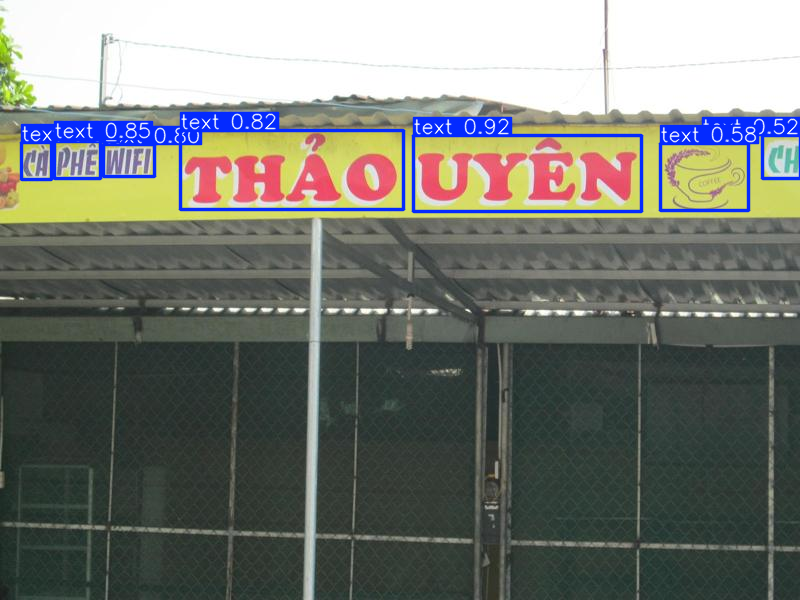

[413.39935302734375, 135.74578857421875, 641.6067504882812, 211.62904357910156]
[54.97669219970703, 139.46121215820312, 100.537353515625, 178.84376525878906]
[180.93482971191406, 130.0630645751953, 403.08404541015625, 209.3785400390625]
[21.097917556762695, 142.95989990234375, 51.524078369140625, 179.75787353515625]
[103.9108657836914, 144.44247436523438, 154.6715087890625, 176.66290283203125]
[660.2887573242188, 143.64215087890625, 748.8622436523438, 210.58575439453125]
[762.0240478515625, 135.21148681640625, 800.0, 178.48556518554688]


In [16]:
# Test trên 1 ảnh
results = model(f"{base_dir}/images/test/im1201.jpg")
results[0].show()  # Hiển thị ảnh và bbox detect được
# Hoặc truy cập bbox:
for box in results[0].boxes.xyxy:
    print(box.tolist())

In [28]:
from ultralytics import YOLO
import torch
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import cv2
import matplotlib.pyplot as plt

from model_cnn_transformer import OCRModel
from dataset_polygon import char2idx, idx2char

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
VOCAB_SIZE = len(char2idx)
OCR_MODEL_PATH = "best_ocr_model.pth"
YOLO_MODEL_PATH = "runs/detect/train/weights/best.pt"

In [25]:
from torchvision import transforms



def preprocess_ocr_image(pil_img):

    transform = transforms.Compose(
        [
            transforms.Resize((32, 128)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ]
    )

    return transform(pil_img).unsqueeze(0)



def decode_sequence(indices):

    chars = []


    SOS_TOKEN = next((token for token in char2idx.keys() if "SOS" in token), None)

    for idx in indices:

        ch = idx2char.get(idx, "")


        if ch == "<EOS>":

            break


        if ch not in ("<PAD>", SOS_TOKEN):

            chars.append(ch)

    return "".join(chars)

In [52]:
!wget -O Roboto-Regular.ttf "https://github.com/PolymerElements/font-roboto-local/raw/refs/heads/master/fonts/roboto/Roboto-Regular.ttf"

--2025-05-17 17:48:38--  https://github.com/PolymerElements/font-roboto-local/raw/refs/heads/master/fonts/roboto/Roboto-Regular.ttf
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/PolymerElements/font-roboto-local/refs/heads/master/fonts/roboto/Roboto-Regular.ttf [following]
--2025-05-17 17:48:39--  https://raw.githubusercontent.com/PolymerElements/font-roboto-local/refs/heads/master/fonts/roboto/Roboto-Regular.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162876 (159K) [application/octet-stream]
Saving to: ‘Roboto-Regular.ttf’

Roboto-Regular.ttf  100%[===================>] 159.06K  --.-K

In [66]:
# Load models
yolo_model = YOLO(YOLO_MODEL_PATH)
ocr_model = OCRModel(vocab_size=VOCAB_SIZE).to(DEVICE)
ocr_model.load_state_dict(torch.load(OCR_MODEL_PATH, map_location=DEVICE))
ocr_model.eval()

FONT_PATH = "Roboto-Regular.ttf"


def draw_vietnamese_boxes_text(img_pil, bboxes, texts, font_size=18):
    draw = ImageDraw.Draw(img_pil)
    font = ImageFont.truetype(FONT_PATH, font_size)
    for (x1, y1, x2, y2), txt in zip(bboxes, texts):
        draw.rectangle([x1, y1, x2, y2], outline=(0, 255, 0), width=2)
        draw.text((x1, max(y1 - 22, 0)), txt, fill=(255, 0, 0), font=font)
    return img_pil


def yolo_ocr_pipeline(image_path, show_image=True):
    # 1. Detection
    results = yolo_model(image_path)
    boxes = results[0].boxes.xyxy.cpu().numpy()
    confs = results[0].boxes.conf.cpu().numpy()  # confidence scores
    filtered = [(box, conf) for box, conf in zip(boxes, confs) if conf > 0.5]
    boxes = [box for box, conf in filtered]

    # 2. Crop từng bbox và nhận diện text
    img_pil = Image.open(image_path).convert("RGB")
    texts = []
    bboxes = []
    for box in boxes:
        x1, y1, x2, y2 = map(int, box)
        crop = img_pil.crop((x1, y1, x2, y2))
        image_tensor = preprocess_ocr_image(crop).to(DEVICE)
        with torch.no_grad():
            memory = ocr_model.encoder(image_tensor)
            SOS_TOKEN = next(
                (token for token in char2idx.keys() if "SOS" in token), None
            )
            MAX_LEN = 36
            ys = torch.tensor([[char2idx[SOS_TOKEN]]], device=DEVICE)
            for _ in range(MAX_LEN):
                out = ocr_model.decoder(
                    ys,
                    memory,
                    tgt_mask=ocr_model.generate_square_subsequent_mask(ys.size(1)).to(
                        DEVICE
                    ),
                )
                prob = out[:, -1, :]
                _, next_word = torch.max(prob, dim=1)
                ys = torch.cat([ys, next_word.unsqueeze(1)], dim=1)
                if next_word.item() == char2idx["<EOS>"]:
                    break
            pred_text = decode_sequence(ys.squeeze(0).tolist())
            texts.append(pred_text)
            bboxes.append((x1, y1, x2, y2))

    # 3. Hiển thị kết quả
    if show_image:
        img_vn = draw_vietnamese_boxes_text(img_pil.copy(), bboxes, texts, font_size=15)
        plt.figure(figsize=(16, 12))
        plt.imshow(img_vn)
        plt.axis("off")
        plt.show()

    return list(zip(bboxes, texts))


image 1/1 /kaggle/working/CNN_TR_OCR/vietnamese/unseen_test_images/im1510.jpg: 512x640 3 texts, 7.7ms
Speed: 3.3ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 512, 640)


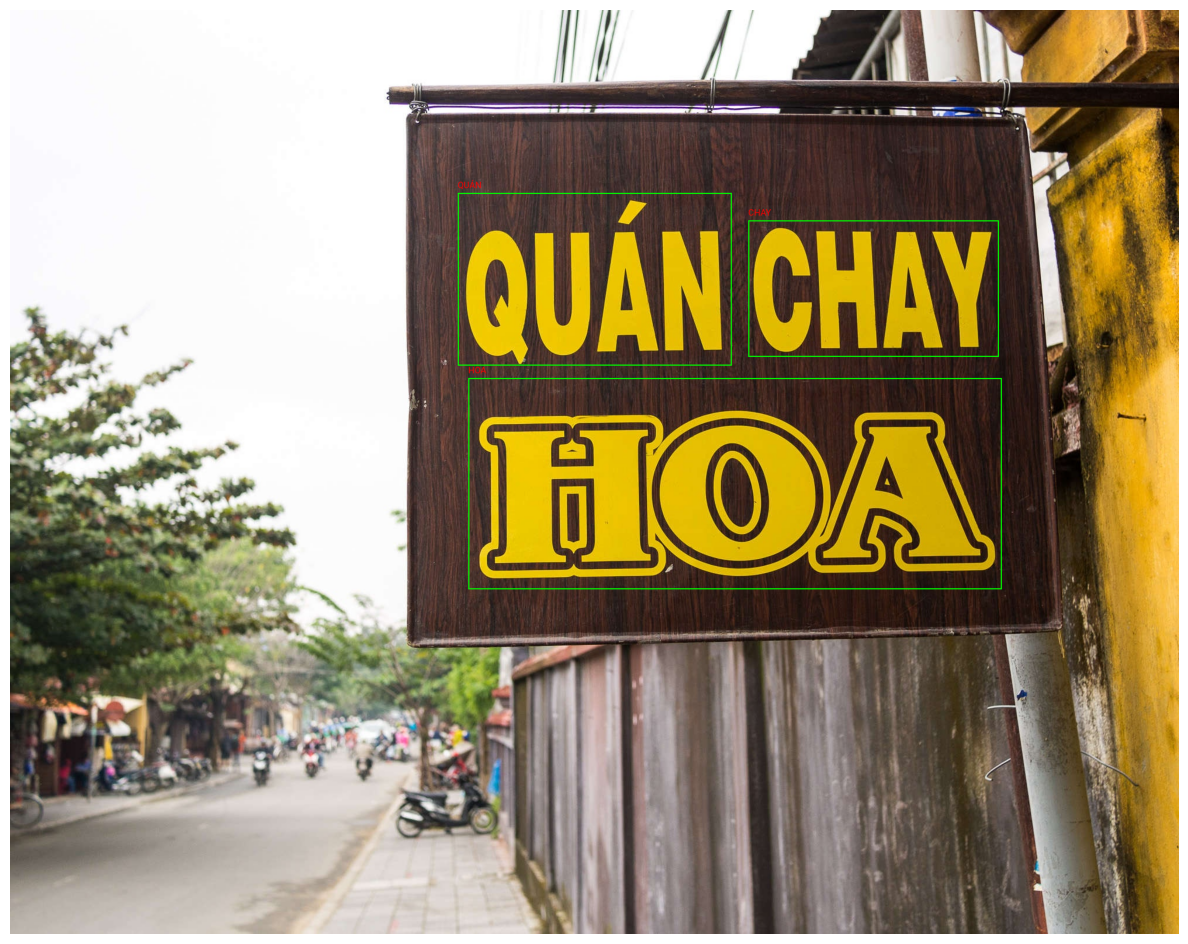

[((784, 630, 1696, 991), 'HOA'), ((766, 313, 1234, 608), 'QUÁN'), ((1263, 360, 1691, 593), 'CHAY')]


In [69]:
result = yolo_ocr_pipeline(
    "/kaggle/working/CNN_TR_OCR/vietnamese/unseen_test_images/im1510.jpg"
)


print(result)


image 1/1 /kaggle/working/CNN_TR_OCR/vietnamese/unseen_test_images/im1515.jpg: 480x640 9 texts, 8.1ms
Speed: 2.1ms preprocess, 8.1ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


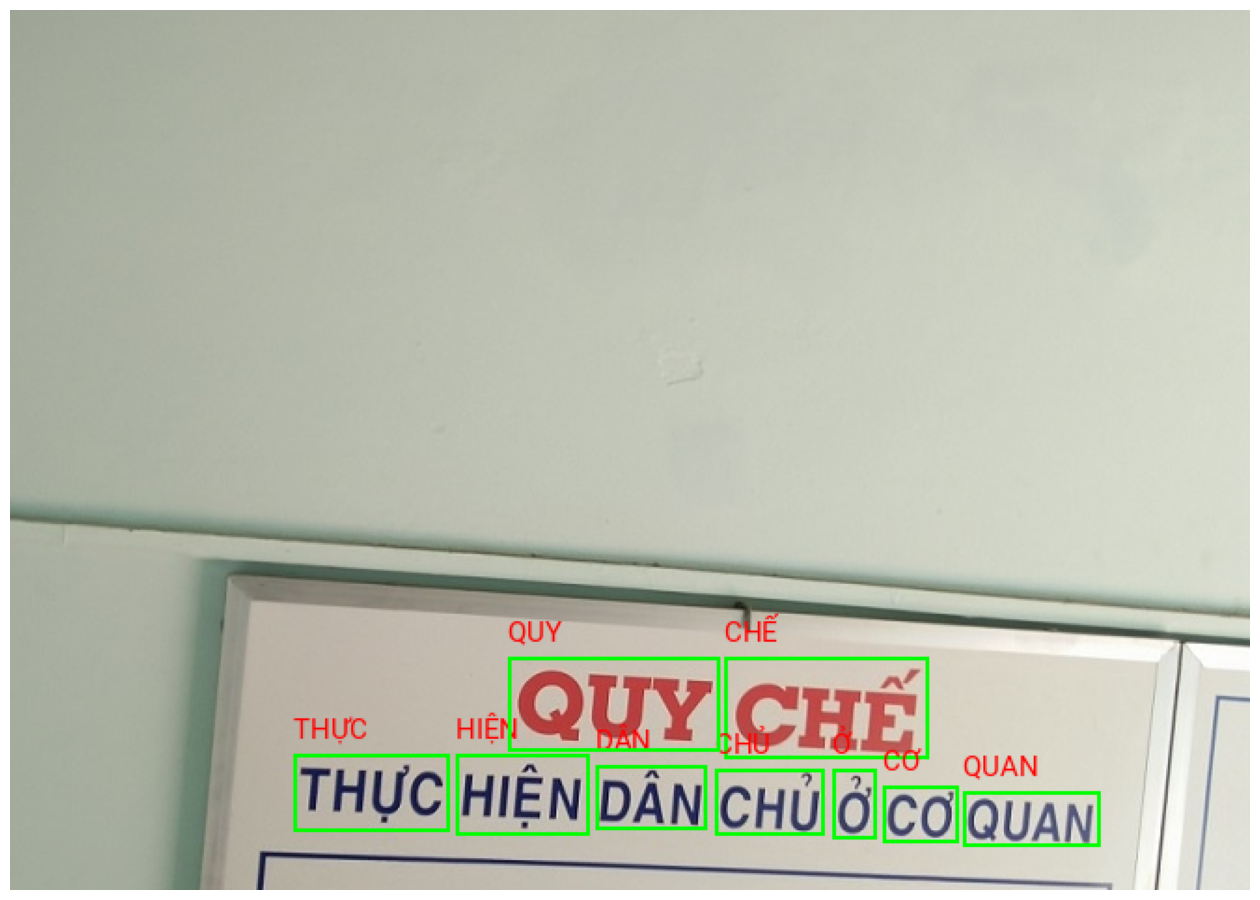

[((152, 399, 235, 440), 'THỰC'), ((239, 399, 310, 442), 'HIỆN'), ((383, 347, 492, 401), 'CHẾ'), ((378, 407, 436, 442), 'CHỦ'), ((314, 405, 373, 439), 'DÂN'), ((267, 347, 380, 397), 'QUY'), ((511, 419, 584, 448), 'QUAN'), ((468, 416, 508, 446), 'CƠ'), ((441, 407, 464, 444), 'Ở')]


In [86]:
result = yolo_ocr_pipeline(
    "/kaggle/working/CNN_TR_OCR/vietnamese/unseen_test_images/im1515.jpg"
)


print(result)